In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


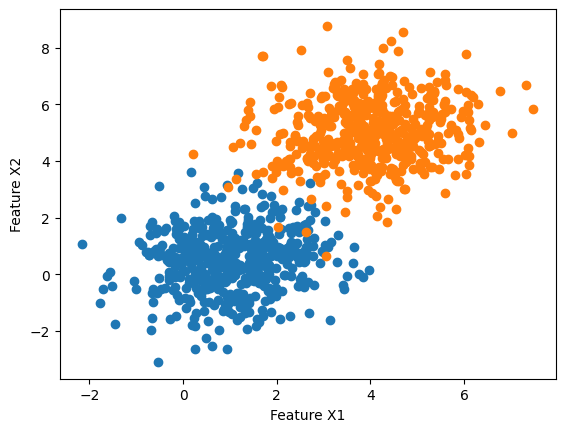

In [5]:
plt.scatter(dist_01[:,0],dist_01[:,1])
plt.scatter(dist_02[:,0],dist_02[:,1])
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.show()

In [6]:
data = np.zeros((1000,3))

In [7]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [9]:
np.random.shuffle(data)
data[:10]

array([[ 6.44714567,  5.27344779,  1.        ],
       [ 1.55543619,  1.01016447,  0.        ],
       [ 1.73007255, -0.41094248,  0.        ],
       [ 6.12573138,  5.1585462 ,  1.        ],
       [ 6.07413718,  5.73452674,  1.        ],
       [ 4.27537101,  5.37569602,  1.        ],
       [ 0.0475847 ,  0.12283044,  0.        ],
       [-2.15368409,  1.05315975,  0.        ],
       [ 1.93778034,  2.44547503,  0.        ],
       [ 1.93474994,  5.85010979,  1.        ]])

In [20]:
# Divide data into train and test part

split = int(0.8*data.shape[0])

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


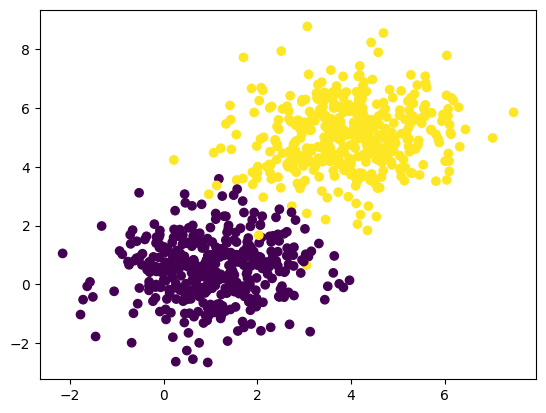

In [21]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

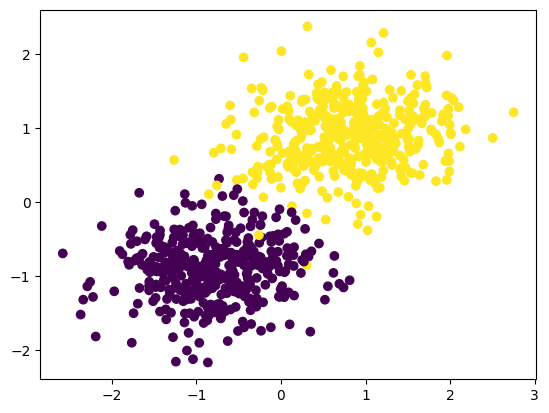

In [22]:
# Data Normalisation
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
# x_mean, x_std



X_train = (X_train - x_mean)/x_std
X_test = (X_test - x_mean)/x_std

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

# Logistic Regression Implementation

In [25]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    """
    X - entire array(m,n+1)
    theta = np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    X = (m,n+1)
    y = (m,1)
    theta = (n+1,1)

    return
        scale_value = loss
    """
    hi = hypothesis(X,theta)
    e = -1*np.mean(y*np.log(hi) + ((1-y)*np.log(1-hi)))

    return e


In [34]:
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,lr=0.1,max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))

    error_list = []

    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        grad = gradient(X,y,theta)
        theta = theta - lr*grad

    return (theta,error_list)

In [27]:
ones = np.ones((X_train.shape[0],1))
X_New_train = np.hstack((ones,X_train))
# X_New_train.shape

(800, 3)

In [31]:
# Y_train,Y_train.shape
Y_train = Y_train.reshape((-1,1))
# Y_train,Y_train.shape


(array([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
      

In [35]:
theta,error_list = gradient_descent(X_New_train,Y_train)

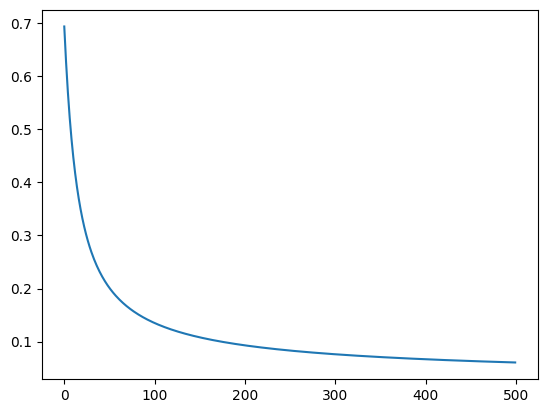

In [36]:
plt.plot(error_list)

## Visualise Decision Surface

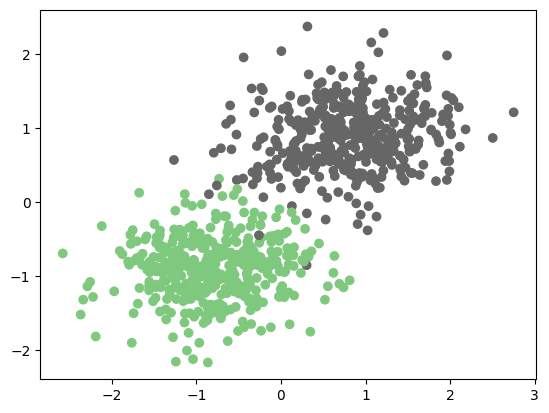

In [38]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)

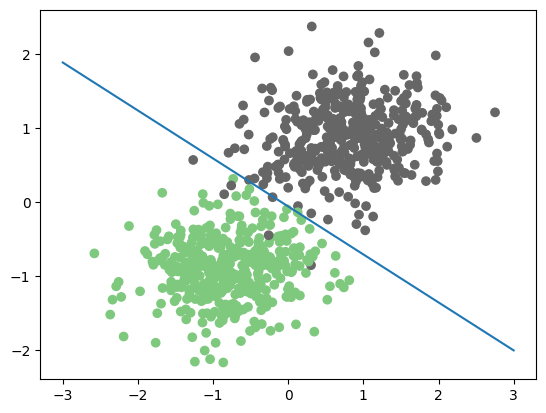

In [40]:
x1 = np.arange(-3,4)

x2 = -(theta[0] + theta[1]*x1)/theta[2]

plt.plot(x1,x2)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.show()


## Predictions & Accuracy

In [41]:
ones = np.ones((X_test.shape[0],1))
X_New_test = np.hstack((ones,X_test))
X_New_test.shape

(200, 3)

In [45]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1

    print(output[:5,:])
    output = output.astype('int')
    return output

XT_preds = predict(X_New_train,theta)
Xt_preds = predict(X_New_test,theta)

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]]
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [49]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    
    acc = np.sum(actual==preds)/actual.shape[0]

    return acc*100


In [50]:
accuracy(Y_train,XT_preds)

99.125

In [51]:
accuracy(Y_test,Xt_preds)

99.0

# How to use Sk-Learn

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train,Y_train)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
theta_0 = model.intercept_
theta_s = model.coef_

theta_0,theta_s

(array([0.41971664]), array([[2.43789026, 4.7676976 ]]))

In [56]:
model.score(X_train,Y_train)

0.99125

In [57]:
model.score(X_test,Y_test)

0.99

In [58]:
y_pred = model.predict(X_test)

In [60]:
y_pred.shape

(200,)